

Uno de los algoritmos no supervisados ​​más utilizados, el análisis de componentes principales (PCA).
PCA es fundamentalmente un algoritmo de reducción de dimensionalidad, pero también puede ser útil como herramienta para visualización, filtrado de ruido, extracción e ingeniería de características, y mucho más.
Después de una breve discusión conceptual del algoritmo PCA, veremos un par de ejemplos de estas aplicaciones adicionales.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

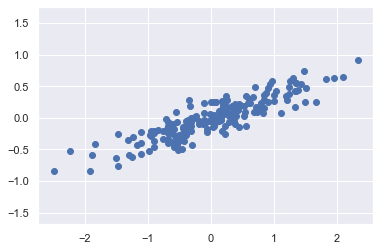

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [3]:
np.mean(X, axis=0)

array([ 0.03351168, -0.00408072])

In [4]:
A= (X-np.mean(X, axis=0))/np.var(X, axis=0)

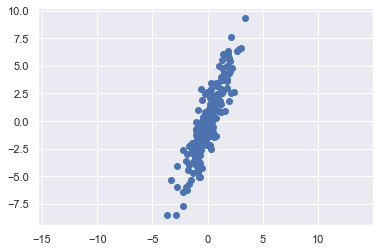

In [5]:
plt.scatter(A [:, 0], A [:, 1])
plt.axis('equal');

In [6]:
conv=np.dot(A.T,A)/A.shape[0]

In [7]:
A.shape[0]

200

In [8]:
print(conv)

[[ 1.47326021  3.44248517]
 [ 3.44248517 10.16904704]]


In [9]:
values, vectors = np.linalg.eig(conv) #Fiding the eigen vector space


In [10]:
values

array([ 0.27544526, 11.36686199])

In [11]:
vectors

array([[-0.94446029, -0.32862557],
       [ 0.32862557, -0.94446029]])


Está claro que existe una relación casi lineal entre las variables x e y.
Esto recuerda los datos de regresión lineal, pero la configuración del problema aquí es ligeramente diferente: en lugar de intentar * predecir * los valores de y a partir de x valores, el problema de aprendizaje no supervisado intenta aprender acerca de la * relación * entre los valores x e y.

En el análisis de componentes principales, esta relación se cuantifica al encontrar una lista de los * ejes principales * en los datos y usar esos ejes para describir el conjunto de datos.
Usando el estimador `` PCA '' podemos calcular esto de la siguiente manera:

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(A)

PCA(n_components=2)

El ajuste aprende algunas cantidades de los datos, lo más importante, los "componentes" y la "varianza explicada":

In [14]:
print(pca.components_)

[[ 0.32862557  0.94446029]
 [-0.94446029  0.32862557]]


In [15]:
print(pca.explained_variance_)

[11.4239819   0.27682941]


Para ver qué significan estos números, visualizemos los como vectores estan sobre los datos de entrada, usando los "componentes" para definir la dirección del vector, y la "varianza explicada" para definir la longitud al cuadrado del vector:

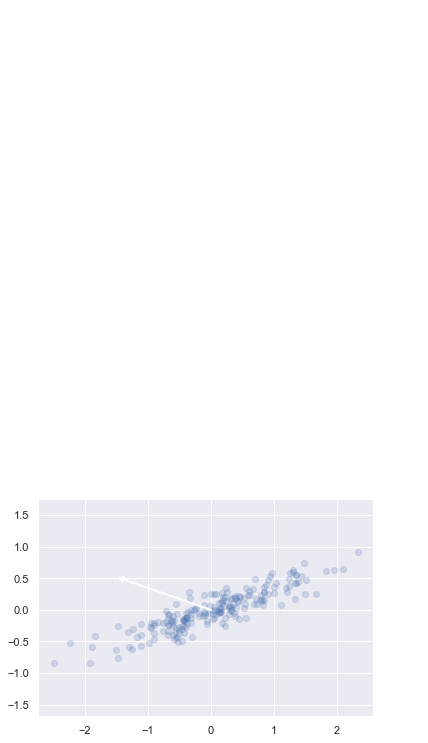

In [17]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Estos vectores representan los * ejes principales * de los datos, y la longitud del vector es una indicación de cuán "importante" es ese eje para describir la distribución de los datos; más precisamente, es una medida de la varianza de los datos. cuando se proyecta sobre ese eje.
La proyección de cada punto de datos sobre los ejes principales son los "componentes principales" de los datos.

Si graficamos estos componentes principales junto a los datos originales, vemos las gráficas que se muestran aquí:

Esta transformación de ejes de datos a ejes principales es una * transformación afín *, lo que básicamente significa que se compone de una traslación, rotación y escala uniforme.

Si bien este algoritmo para encontrar componentes principales puede parecer solo una curiosidad matemática, resulta tener aplicaciones de gran alcance en el mundo del aprendizaje automático y la exploración de datos

### PCA 

El uso de PCA para la reducción de dimensionalidad implica poner a cero uno o más de los componentes principales más pequeños, lo que da como resultado una proyección de menor dimensión de los datos que conserva la varianza máxima de los datos.

Aquí hay un ejemplo del uso de PCA como una transformación de reducción de dimensionalidad:



In [15]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Los datos transformados se han reducido a una sola dimensión.
Para comprender el efecto de esta reducción de dimensionalidad, podemos realizar la transformación inversa de estos datos reducidos y trazarlos junto con los datos originales: 

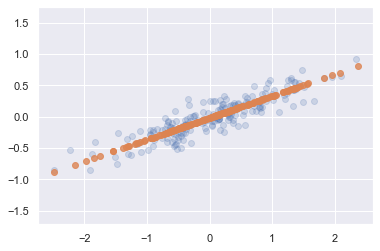

In [16]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Los puntos claros son los datos originales, mientras que los puntos oscuros son la versión proyectada.
Esto deja en claro lo que significa una reducción de dimensionalidad de PCA: la información a lo largo del eje o ejes principales menos importantes se elimina, dejando solo el (los) componente (s) de los datos con la varianza más alta.
La fracción de varianza que se corta (proporcional a la extensión de puntos alrededor de la línea formada en esta figura) es aproximadamente una medida de cuánta "información" se descarta en esta reducción de dimensionalidad.

Este conjunto de datos de dimensión reducida es, en algunos sentidos, "lo suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos en un 50%, la relación general entre los puntos de datos se conserva en su mayoría. 

### Reducción de dimensionalidad
La utilidad de la reducción de dimensionalidad puede no ser del todo evidente en solo dos dimensiones, pero se vuelve mucho más clara cuando se observan datos de alta dimensión.
Empezamos cargando los datos: 

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [20]:
def mostrarImagenes(img):
    size=100, 100
    #fig1=plt.figure('name')
    fig1, axes_array = plt.subplots(5, 5)
    fig1.set_size_inches(5,5)
    count=0
    for x in range(5):
        for y in range (5):
            image_plot=axes_array[x][y].imshow(img[count],cmap=plt.cm.gray)
            axes_array[x][y].axis('off')
            count=count+1
    plt.show()

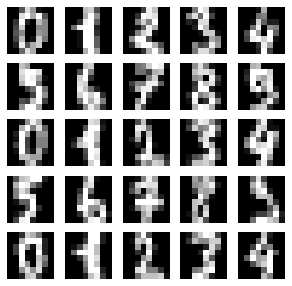

In [21]:
mostrarImagenes(digits.data.reshape((1797,8,8)).tolist())# mostramos las primeras 25

Recuerde que los datos constan de imágenes de 8 × 8 píxeles, lo que significa que son de 64 dimensiones.
Para obtener algo de intuición sobre las relaciones entre estos puntos, podemos usar PCA para proyectarlos a un número más manejable de dimensiones, digamos dos: 

In [22]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Graficando las dos componentes principales

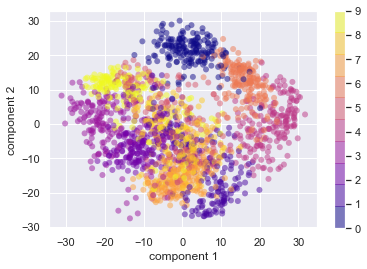

In [25]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('plasma', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recuerde lo que significan estos componentes: los datos completos son una nube de puntos de 64 dimensiones, y estos puntos son la proyección de cada punto de datos a lo largo de las direcciones con la mayor varianza.
Básicamente, hemos encontrado el estiramiento y la rotación óptimos en un espacio de 64 dimensiones que nos permite ver el diseño de los dígitos en dos dimensiones, y lo hemos hecho sin supervisión, es decir, sin hacer referencia a las etiquetas. 

### Elegir el número de componentes

Una parte vital del uso de PCA en la práctica es la capacidad de estimar cuántos componentes se necesitan para describir los datos.
Esto se puede determinar observando la relación de varianza acumulada * explicada * en función del número de componentes: 

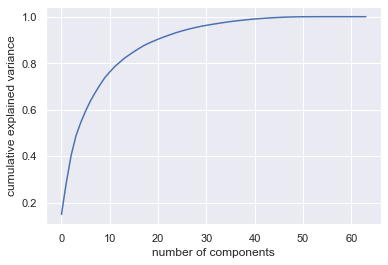

In [21]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Esta curva cuantifica qué parte de la varianza total de 64 dimensiones está contenida dentro de los primeros componentes de $ N $.
Por ejemplo, vemos que con los dígitos, los primeros 10 componentes contienen aproximadamente el 75% de la varianza, mientras que necesita alrededor de 50 componentes para describir cerca del 100% de la varianza.

Aquí vemos que nuestra proyección bidimensional pierde mucha información (medida por la varianza explicada) y que necesitaríamos alrededor de 20 componentes para retener el 90% de la varianza. Mirar esta gráfica para un conjunto de datos de alta dimensión puede ayudarlo a comprender el nivel de redundancia presente en múltiples observaciones. 

In [26]:
digits.data.shape

(1797, 64)

In [27]:
X=digits.data.T


In [28]:
B = np.subtract(X.T, np.mean(X,axis=1))

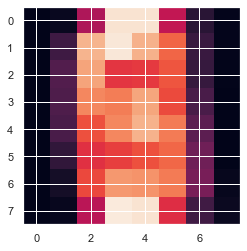

In [29]:
plt.imshow(np.reshape(np.mean(X,axis=1),(8,8)))
plt.show()

In [30]:
B.shape

(1797, 64)

NameError: name 's' is not defined

In [32]:

U, s, V = np.linalg.svd(B,full_matrices=False)
Eigen_vec=[]
# recordando que V esta asociado a la espacio de columnas, los pixeles en este caso
# recurde que 
for x in range(V.shape[0]):
    fig=np.reshape(V[x],(8,8))
    Eigen_vec.append(fig)


In [34]:
U

array([[ 2.22125549e-03, -3.92343213e-02,  1.87524394e-02, ...,
         0.00000000e+00,  0.00000000e+00, -9.92340327e-01],
       [-1.40344253e-02,  3.83008353e-02, -8.79753643e-03, ...,
         4.41759745e-02, -5.70008442e-03, -3.71557006e-03],
       [-1.23312910e-02,  1.83604470e-02, -5.86281949e-03, ...,
         2.29700296e-02,  3.58497412e-04, -2.59471060e-03],
       ...,
       [-1.90496624e-02,  1.28358293e-02, -1.10963437e-02, ...,
        -3.83547960e-03,  5.05784269e-03, -2.15934742e-03],
       [ 8.59266961e-03, -2.29117771e-02,  2.01550728e-02, ...,
         9.15453936e-04,  2.37727567e-03,  2.75282594e-03],
       [ 6.07382085e-04, -1.17391008e-02, -2.13496934e-02, ...,
        -3.22179583e-03, -8.68224340e-04, -6.02046487e-03]])

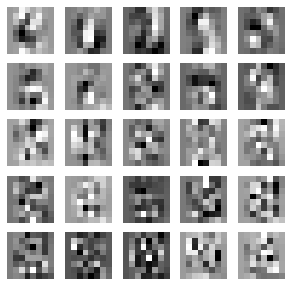

In [60]:
fig3, axes_array = plt.subplots(5, 5)
fig3.set_size_inches(5, 5)
count = 0
for x in range(5):
    for y in range(5):
        draw_image = Eigen_vec[count]
        image_plot = axes_array[x][y].imshow(draw_image, cmap=plt.cm.gray)
        axes_array[x][y].axis('off')
        count = count + 1
fig3.canvas.set_window_title('los primeros 25 autovectores')
plt.show()